# Titanic Data Preprocessing  
Preprocessing the Kaggle Titanic dataset for ML models.

## Overview  
This project cleans and prepares the Titanic dataset by handling missing values and removing irrelevant features.

## Tools  
- Python  
- Pandas, NumPy  
- Seaborn, Matplotlib (for visualization)  

## Steps  
1. Loaded and explored the dataset.  
2. Visualized survival rates by class.  
3. Filled missing `Age` with median, dropped `Cabin`, and cleaned `Embarked`.  
4. Removed unnecessary columns (`PassengerId`, `Name`, `Ticket`).  

## Files  
- `titanic_preprocessing.ipynb`: Full preprocessing code.  

## How to Run  
1. Install dependencies: `pip install pandas numpy seaborn matplotlib`  
2. Download the dataset from [Kaggle Titanic](https://www.kaggle.com/c/titanic/data).  
3. Run the notebook: `jupyter notebook titanic_preprocessing.ipynb`  

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic Data Preprocessing
This notebook preprocesses the Titanic dataset from Kaggle to prepare it for machine learning models.

## 1. Loading the Data
We start by importing libraries and loading the dataset.

In [37]:
data = pd.read_csv('titanic/train.csv')
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Exploring the Data
Let’s check the structure and missing values to understand what we’re working with.

In [38]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observations:
- `Age`: 177 missing values — we'll fill them later.
- `Cabin`: 687 missing values (too many, likely to drop).
- `Embarked`: 2 missing values — minor issue.

## 4. Preprocessing
### 4.1 Handling Missing Values
- Fill `Age` with median to preserve distribution.
- Drop `Cabin` due to excessive missing data (77% missing).
- Fill `Embarked` with mode (most frequent value).

### Age section

In [39]:
Age = data['Age'].copy(deep= True)

<Axes: >

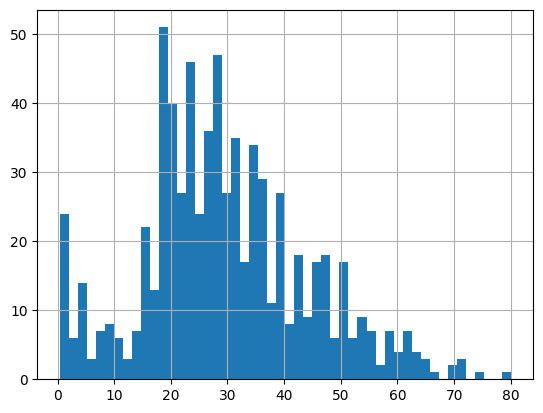

In [40]:
Age.hist(bins = 50)

Age has a value between 1 and 0.Replace value > 0.5 1 < 0.5 0

In [41]:
Age[Age <= 0.5] = 0
Age[Age.between(0.5,1)] = 1

Many age values equals Nan.this Raplace by mean

In [42]:
Age[Age.isna()] =  Age.median()

<Axes: >

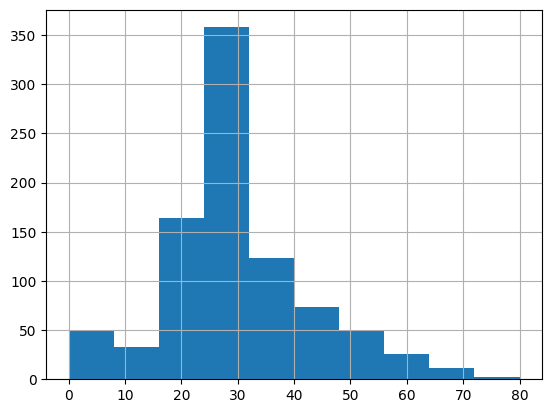

In [43]:
Age.hist()

### Embarked section

In [44]:
Embarked = data['Embarked'].copy(deep = True)

Embarked has only two Nan value

In [45]:
Embarked = Embarked.dropna()

In [46]:
Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

### Cabin section

In [47]:
Cabin = data['Cabin'].copy(deep = True)

Values is nan to many in data.Better not use thic column

Concatenate Data

In [48]:

data['Age'] = Age
data = data.iloc[Embarked.index]
data['Embarked'] = Embarked
data = data.drop(columns = ['Cabin'])

### Quantilisation data

In [49]:
categorical = data.select_dtypes(include='object').copy(deep = True)
categorical.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [50]:
categorical = categorical.drop(columns=['Name','Ticket'])
categorical.replace({'male':0,'female':1},inplace=True)


C:\Users\JACK\AppData\Local\Temp\ipykernel_26612\2729025111.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical.replace({'male':0,'female':1},inplace=True)


In [51]:
EncodedEmbar = pd.get_dummies(categorical['Embarked'],prefix= 'Embar').astype(int)
categorical.drop(columns=['Embarked'],inplace=True)
categorical= pd.concat([categorical,EncodedEmbar],axis = 1)

In [66]:
Result = pd.concat([data.select_dtypes(exclude='object'),categorical],axis = 1)


### Analise important columns and distibution

In [67]:
Result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embar_C,Embar_Q,Embar_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,0,0


In [68]:
Result['Survived'].sum()/Result.shape[0]

0.38245219347581555

Size Famali

In [69]:
Result['Size Family'] = Result['SibSp']+Result['Parch']

### SibSp Section

In [70]:
for i in Result['SibSp'].unique():
    print(i ,Result[Result['SibSp'] == i]['Survived'].sum()/Result[Result['SibSp'] == i].shape[0],Result[Result['SibSp'] == i].shape[0])

1 0.5358851674641149 209
0 0.3432343234323432 606
3 0.25 16
4 0.16666666666666666 18
2 0.4642857142857143 28
5 0.0 5
8 0.0 7


Value 3,4,5,7 is smal amount in data and can be join

In [71]:
Result['SibSp'].replace({1:1,0:0,3:2,2:3,5:2,8:2,4:2},inplace=True)
EncodedSib  = pd.get_dummies(Result['SibSp'],prefix='SibSp').astype(int)

C:\Users\JACK\AppData\Local\Temp\ipykernel_26612\2769668075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Result['SibSp'].replace({1:1,0:0,3:2,2:3,5:2,8:2,4:2},inplace=True)


### Parch section

In [72]:
for i in Result['Parch'].unique():
    print(i ,Result[Result['Parch'] == i]['Survived'].sum()/Result[Result['Parch'] == i].shape[0],Result[Result['Parch'] == i].shape[0])

0 0.34171597633136097 676
1 0.5508474576271186 118
2 0.5 80
5 0.2 5
3 0.6 5
4 0.0 4
6 0.0 1


We join the 5,3,4,1 value

In [73]:
Result['Parch'].replace({1:1,0:0,3:3,2:2,5:3,6:3,4:3},inplace=True)
EncodedParch  = pd.get_dummies(Result['Parch'],prefix = 'Parch').astype(int)

C:\Users\JACK\AppData\Local\Temp\ipykernel_26612\3581301788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Result['Parch'].replace({1:1,0:0,3:3,2:2,5:3,6:3,4:3},inplace=True)


### Fare section

<Axes: >

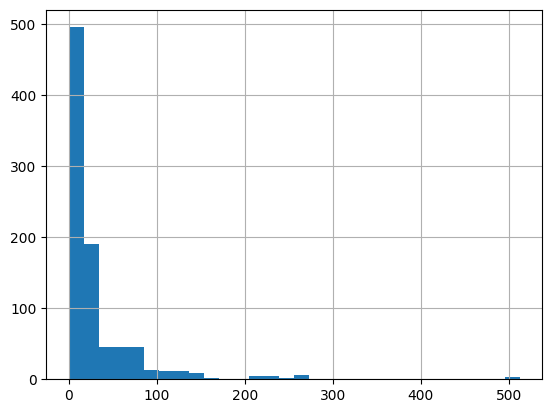

In [74]:
Result['Fare'].hist(bins = 30)

In [75]:
Result[Result['Fare']==0]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embar_C,Embar_Q,Embar_S,Size Family
179,180,0,3,36.0,0,0,0.0,0,0,0,1,0
263,264,0,1,40.0,0,0,0.0,0,0,0,1,0
271,272,1,3,25.0,0,0,0.0,0,0,0,1,0
277,278,0,2,28.0,0,0,0.0,0,0,0,1,0
302,303,0,3,19.0,0,0,0.0,0,0,0,1,0
413,414,0,2,28.0,0,0,0.0,0,0,0,1,0
466,467,0,2,28.0,0,0,0.0,0,0,0,1,0
481,482,0,2,28.0,0,0,0.0,0,0,0,1,0
597,598,0,3,49.0,0,0,0.0,0,0,0,1,0
633,634,0,1,28.0,0,0,0.0,0,0,0,1,0


Inplace zero value to mean

In [76]:
Result.loc[Result['Fare'] == 0,'Fare'] = Result[Result['Fare'] < 200]['Fare'].mean()

In [77]:
Result[Result['Fare'] > 250].shape[0]

9

Devide by Class
\0 - 16 - 3 class
\16 - 80 - 2 class
 \> 80 3 class

In [78]:
Result.loc[Result['Fare'].between(0,15,inclusive='right'),'Fare']= 3 
Result.loc[Result['Fare'].between(15,80),'Fare'] = 2
Result.loc[Result['Fare'] >= 80,'Fare'] = 1

In [79]:
Fare = Result['Fare']

Concatenated all redults

In [80]:
Index = Fare.index
Tmp = pd.concat([EncodedParch.loc[Index],EncodedSib.loc[Index],Fare],axis = 1).copy(deep = True)

In [81]:
Result = Result.drop(columns = ['PassengerId','SibSp','Parch','Fare'])
Result = Result.loc[Index]


In [82]:
Result = pd.concat([Tmp,Result],axis = 1)
Result

,Parch_0,Parch_1,Parch_2,Parch_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Fare,Survived,Pclass,Age,Sex,Embar_C,Embar_Q,Embar_S,Size Family
0,1,0,0,0,0,1,0,0,3.0,0,3,22.0,0,0,0,1,1
1,1,0,0,0,0,1,0,0,2.0,1,1,38.0,1,1,0,0,1
2,1,0,0,0,1,0,0,0,3.0,1,3,26.0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,2.0,1,1,35.0,1,0,0,1,1
4,1,0,0,0,1,0,0,0,3.0,0,3,35.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,0,1,0,0,0,3.0,0,2,27.0,0,0,0,1,0
887,1,0,0,0,1,0,0,0,2.0,1,1,19.0,1,0,0,1,0
888,0,0,1,0,0,1,0,0,2.0,0,3,28.0,1,0,0,1,3
889,1,0,0,0,1,0,0,0,2.0,1,1,26.0,0,1,0,0,0


### Download Result Eda

In [83]:
Result.to_csv('Titanic_EDA.csv',index=False)